In [19]:
library(data.table)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(plotly)
library(grid)
library(gtable)
library(ggplotify)
theme_set(theme_bw())
library(viridis)

source('/home/n10853499/00-jupyter/07-rosella_testing/setup.R')

In [20]:
amber_low <- generate_plots_amber("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/00-CAMI_I/00-low_complexity/final_benchmark/data/amber_out/benchmarks/genome/")
amber_low_bench <- do.call(rbind, lapply(Sys.glob("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_uro/binning/amber_sample_2*/benchmarks/"), get_benchmarks))
# amber_med <- generate_plots_amber("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/00-CAMI_I/01-med_complexity/binning/data/amber_out/benchmarks/genome/")
# amber_high <- generate_plots_amber("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/00-CAMI_I/02-hi_complexity/binning/data/amber_out/benchmarks/genome/")

            CONCOCT  DASTool w/ Rosella   DASTool w/ Refine DASTool w/o Rosella 
          "#F8766D"           "#D89000"           "#D99000"           "#A3A500" 
            MaxBin2       MetaBAT Sens.       MetaBAT Spec.  MetaBAT SuperSens. 
          "#39B600"           "#00BF7D"           "#00BFC4"           "#00B0F6" 
 MetaBAT SuperSpec.                VAMB            MetaBAT2    MetaBAT2 Refined 
          "#9590FF"           "#FF62BC"           "#E76BF3"           "#E76BF3" 
            SemiBin     SemiBin Refined             Rosella     Rosella Refined 
          "#880808"           "#880808"           "#000000"           "#000000" 


Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t2, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t3, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and att

In [11]:
# melt(amber_low_bench[, c('m', 'max_rss', 'io_in', 'io_out', 'binner')])

Using binner as id variables



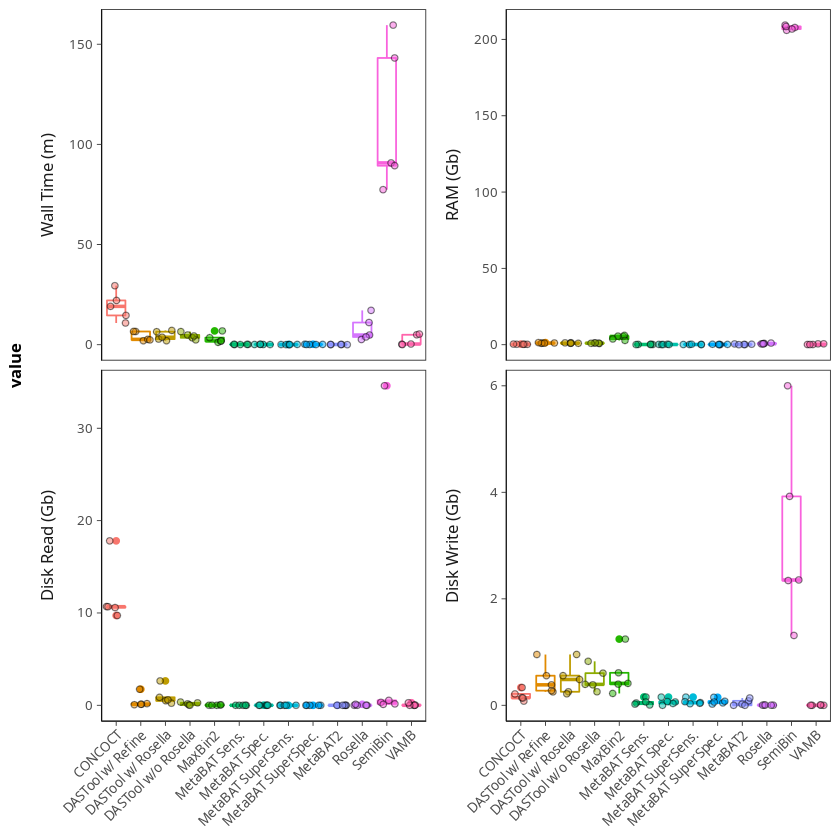

In [21]:
ggplot(data=melt(amber_low_bench[, c('m', 'max_rss', 'io_in', 'io_out', 'binner')])) +
    geom_boxplot(aes(x=binner, y=value, color=binner)) +
    geom_jitter(aes(fill=binner, x=binner, y=value), alpha=0.5, pch=21, color="black") +
    # geom_errorbar(aes(x=binner, ymin=s, ymax=s), color="black", width=0.4, alpha=0.9, size=1.3) +
    # scale_fill_discrete(labels=c("inStrain", "GATK HC", "Lorikeet"), name="Tool") +
    # scale_x_discrete(labels=c("inStrain", "GATK HC", "Lorikeet")) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.x=element_blank(),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=10),
      axis.text.x=element_text(angle=45, hjust=1, vjust=1),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      legend.position="none" ,
      legend.direction="horizontal", 
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank(),
      strip.background = element_blank(),
      strip.placement = "outside") +
      facet_wrap(~variable, scales="free_y", ncol=2,
                strip.position = "left",
                labeller=labeller(
                    variable = as_labeller(c(`m` = "Wall Time (m)", `max_rss` = "RAM (Gb)", `io_in` = "Disk Read (Gb)", `io_out` = "Disk Write (Gb)"))
                )
            )

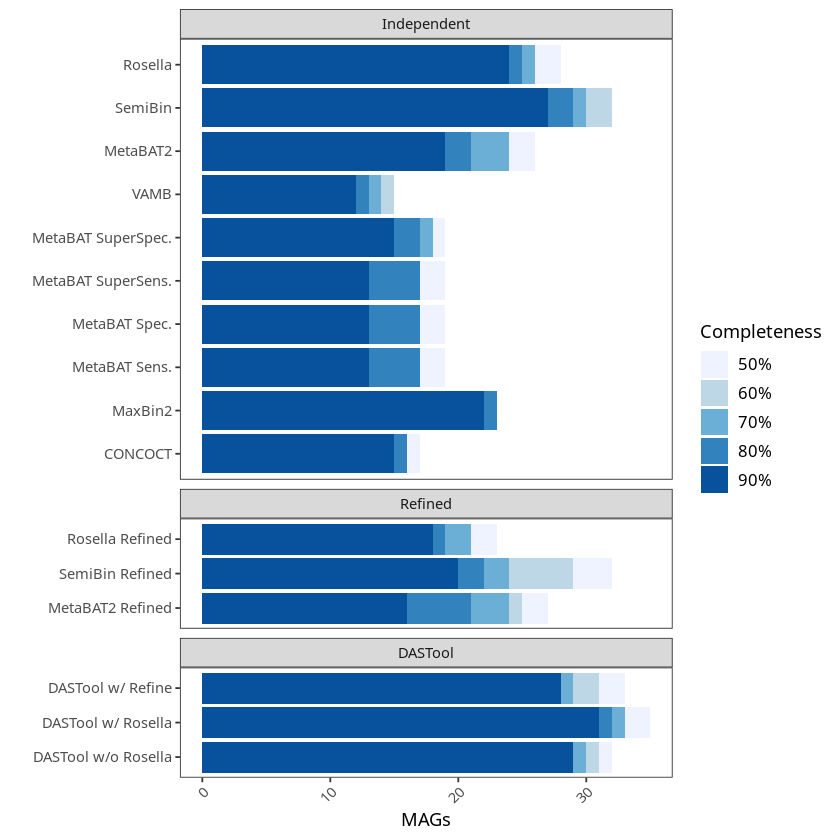

In [288]:
as.ggplot(amber_low[[3]])

            CONCOCT  DASTool w/ Rosella   DASTool w/ Refine DASTool w/o Rosella 
          "#F8766D"           "#D89000"           "#D99000"           "#A3A500" 
            MaxBin2       MetaBAT Sens.       MetaBAT Spec.  MetaBAT SuperSens. 
          "#39B600"           "#00BF7D"           "#00BFC4"           "#00B0F6" 
 MetaBAT SuperSpec.                VAMB            MetaBAT2    MetaBAT2 Refined 
          "#9590FF"           "#FF62BC"           "#E76BF3"           "#E76BF3" 
            SemiBin     SemiBin Refined             Rosella     Rosella Refined 
          "#880808"           "#880808"           "#000000"           "#000000" 


Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t2, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t3, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and att

            CONCOCT  DASTool w/ Rosella   DASTool w/ Refine DASTool w/o Rosella 
          "#F8766D"           "#D89000"           "#D99000"           "#A3A500" 
            MaxBin2       MetaBAT Sens.       MetaBAT Spec.  MetaBAT SuperSens. 
          "#39B600"           "#00BF7D"           "#00BFC4"           "#00B0F6" 
 MetaBAT SuperSpec.                VAMB            MetaBAT2    MetaBAT2 Refined 
          "#9590FF"           "#FF62BC"           "#E76BF3"           "#E76BF3" 
            SemiBin     SemiBin Refined             Rosella     Rosella Refined 
          "#880808"           "#880808"           "#000000"           "#000000" 


Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t2, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t3, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and att

            CONCOCT  DASTool w/ Rosella   DASTool w/ Refine DASTool w/o Rosella 
          "#F8766D"           "#D89000"           "#D99000"           "#A3A500" 
            MaxBin2       MetaBAT Sens.       MetaBAT Spec.  MetaBAT SuperSens. 
          "#39B600"           "#00BF7D"           "#00BFC4"           "#00B0F6" 
 MetaBAT SuperSpec.                VAMB            MetaBAT2    MetaBAT2 Refined 
          "#9590FF"           "#FF62BC"           "#E76BF3"           "#E76BF3" 
            SemiBin     SemiBin Refined             Rosella     Rosella Refined 
          "#880808"           "#880808"           "#000000"           "#000000" 


Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t2, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Joining, by = "binner"
Warning message in `[.data.table`(output, , `:=`(t3, N)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and att

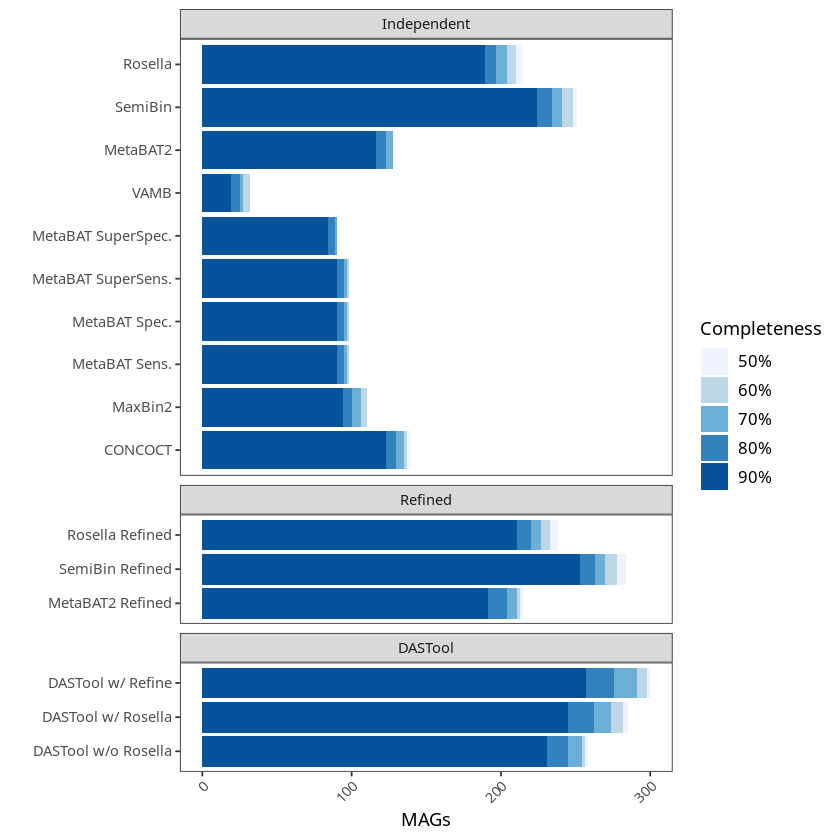

In [279]:


urogenital <- combine_amber_results("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_uro/binning/", "amber_sample_*", "/data/amber_out/benchmarks/genome/")
airways <- combine_amber_results("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Airways/binning/", "amber_sample_*", "/data/amber_out/benchmarks/genome/")
# oral <- combine_amber_results("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Oral/binning/", "amber_sample_*", "/data/amber_out/benchmarks/genome/")
# skin <- combine_amber_results("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Skin/binning/", "amber_sample_*", "/data/amber_out/benchmarks/genome/")
gi <- combine_amber_results("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_gi/binning/", "amber_sample_*", "/data/amber_out/benchmarks/genome/")


# as.ggplot(urogenital[[1]])

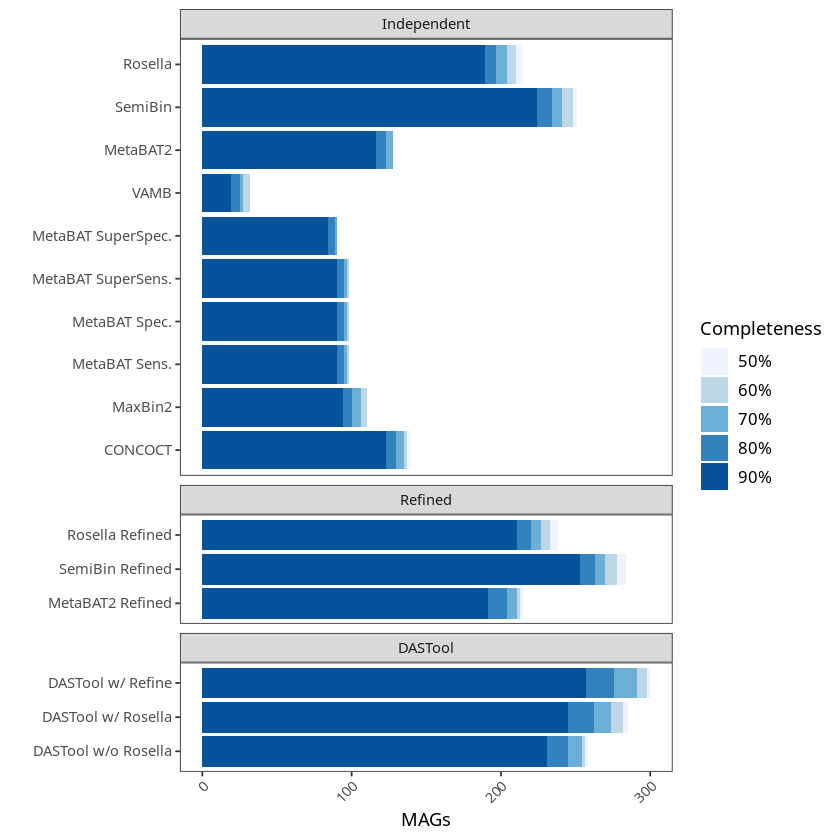

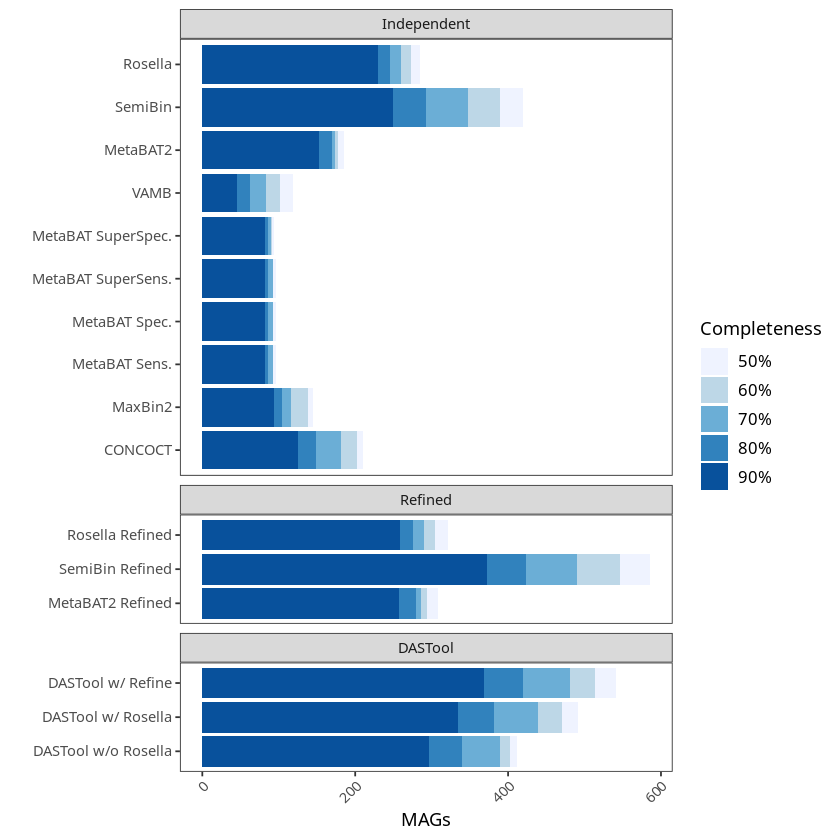

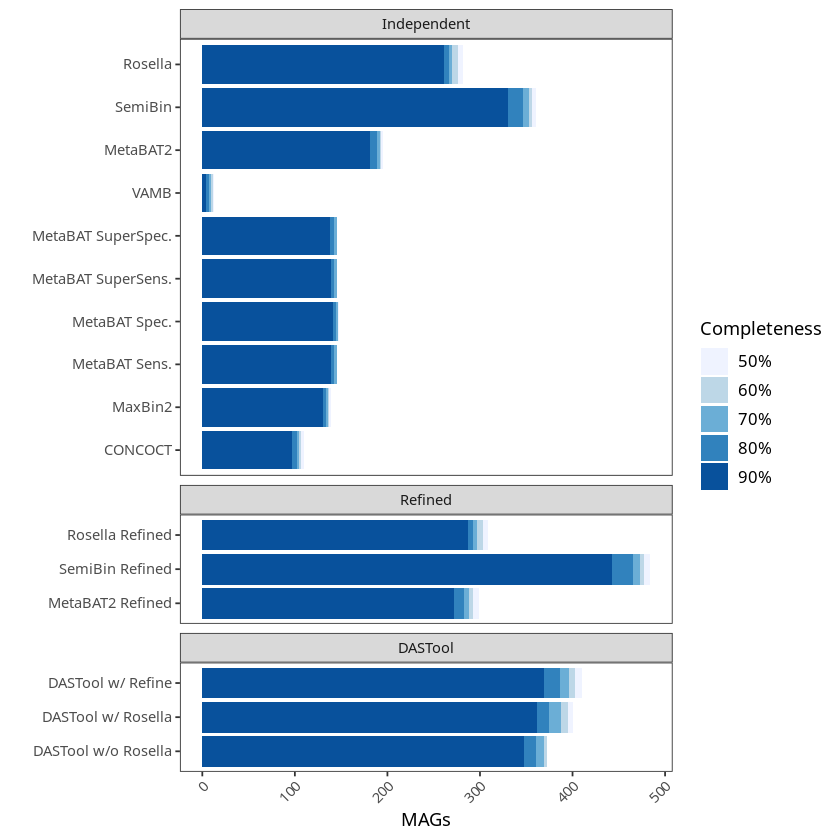

In [280]:
as.ggplot(urogenital[[3]])
as.ggplot(airways[[3]])
as.ggplot(gi[[3]])

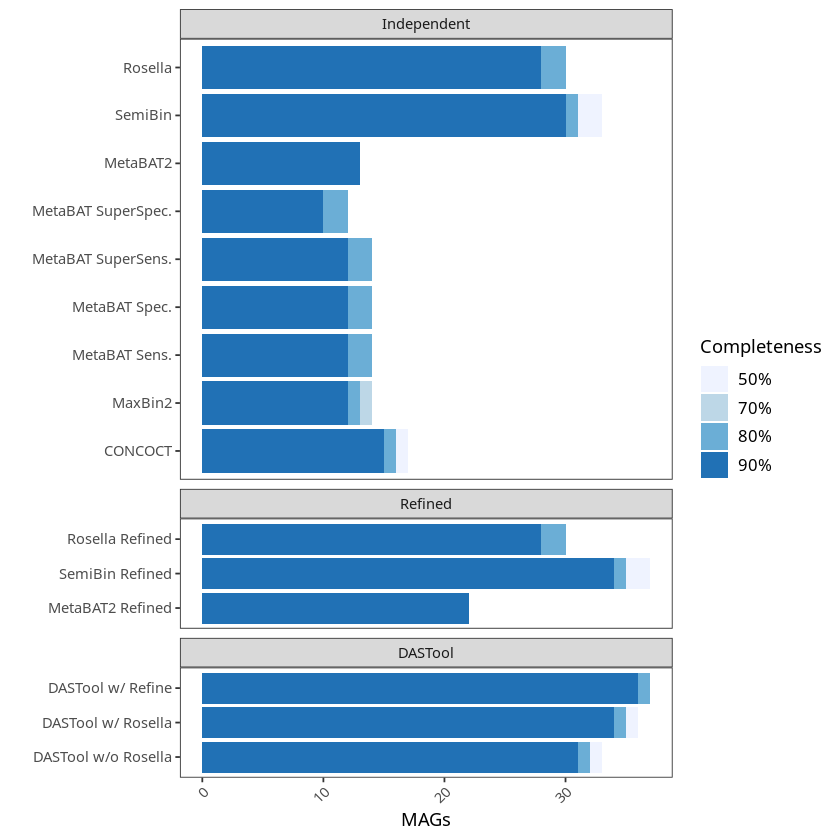

In [268]:
# as.ggplot(amber_low[[3]]) + labs(title="CAMI I - Low complexity")
# as.ggplot(amber_med[[3]])
# as.ggplot(amber_high[[3]])
as.ggplot(amber_uro_0[[3]])

In [224]:
amber_low[[5]][binner=="Rosella"]

sample_id,Bin ID,Most abundant genome,Purity (bp),Completeness (bp),Bin size (bp),True positives (bp),True size of most abundant genome (bp),Purity (seq),Completeness (seq),Bin size (seq),True positives (seq),True size of most abundant genome (seq),binner,Contamination,Completeness,group,com_rank,con_rank,mag_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
gsa,data/rosella_bins/rosella_bin.80.fna,1285_BH,1.0000000,1.00000000,4566533,4566533,4566533,1.0000000,1.000000000,6,6,6,Rosella,0.00,100.000000,Independent,1,10,90%
gsa,data/rosella_bins/rosella_bin.17.fna,evo_1286_AP.026,1.0000000,0.99877076,3206991,3206991,3210938,1.0000000,0.764705882,13,13,17,Rosella,0.00,99.877076,Independent,2,10,90%
gsa,data/rosella_bins/rosella_bin.4.fna,1049005,1.0000000,0.99872561,4102598,4102598,4107833,1.0000000,0.869565217,20,20,23,Rosella,0.00,99.872561,Independent,3,10,90%
gsa,data/rosella_bins/rosella_bin.15.fna,evo_1035930.011,0.8999653,0.99865852,2508869,2257895,2260928,0.8571429,0.964285714,63,54,56,Rosella,10.00,99.865852,Independent,4,31,90%
gsa,data/rosella_bins/rosella_bin.12.fna,evo_1035930.032,1.0000000,0.99760985,2289346,2289346,2294831,1.0000000,0.948275862,55,55,58,Rosella,0.00,99.760985,Independent,5,10,90%
gsa,data/rosella_bins/rosella_bin.7.fna,1049089,0.9954988,0.99677015,3128279,3114198,3124289,0.9545455,0.777777778,22,21,27,Rosella,0.45,99.677015,Independent,6,23,90%
gsa,data/rosella_bins/rosella_bin.26.fna,1030878,1.0000000,0.99644095,3276530,3276530,3288233,1.0000000,0.727272727,16,16,22,Rosella,0.00,99.644095,Independent,7,10,90%
gsa,data/rosella_bins/rosella_bin.76.fna,evo_1286_AP.037,0.9342548,0.99594968,3286554,3070479,3082966,0.7058824,0.705882353,17,12,17,Rosella,6.57,99.594968,Independent,8,30,90%
gsa,data/rosella_bins/rosella_bin.40.fna,evo_1049056.013,1.0000000,0.99580665,3500346,3500346,3515086,1.0000000,0.769230769,20,20,26,Rosella,0.00,99.580665,Independent,9,10,90%


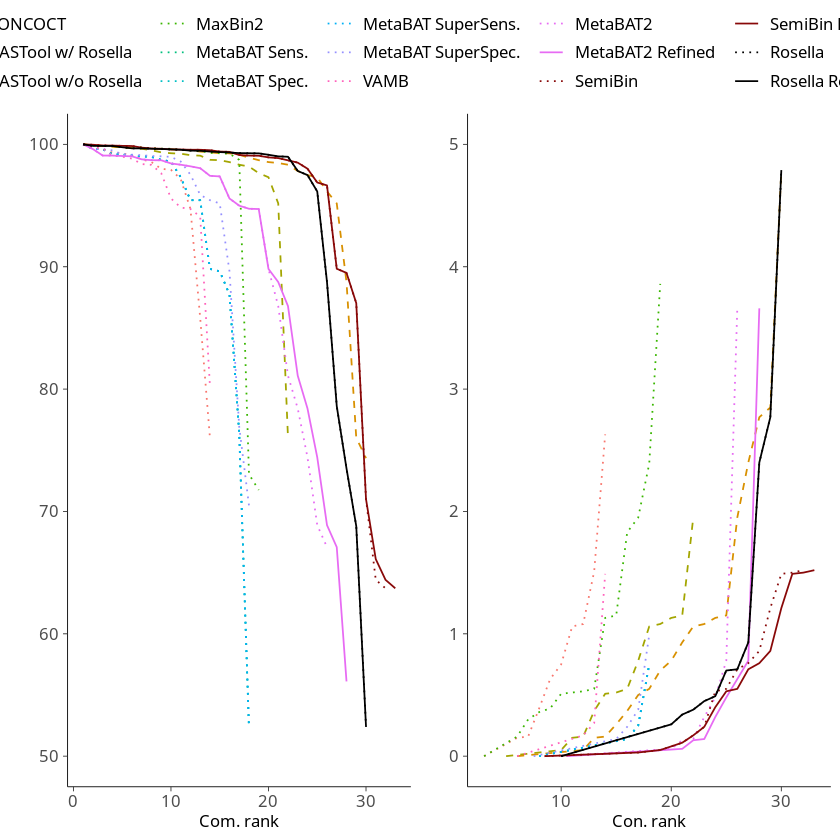

In [251]:
ggarrange(amber_low[[1]], amber_low[[2]], common.legend=TRUE)

In [249]:
amber_high[[4]]

binner,t1,t2,t3,t4,t5
<fct>,<int>,<int>,<int>,<int>,<int>
CONCOCT,56,72,75,76,76
DASTool w/o Rosella,301,359,400,406,412
DASTool w/ Rosella,378,432,479,490,496
MaxBin2,165,204,224,229,235
MetaBAT Sens.,109,127,139,145,158
MetaBAT Spec.,110,128,140,146,158
MetaBAT SuperSens.,110,128,139,143,154
MetaBAT SuperSpec.,130,152,165,171,185
VAMB,305,368,420,431,432
